# Iris Veri Seti

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('/Users/abdullahyunus/Desktop/Python Çalışmaları/Veri Bilimi Bootcamp/iris.csv')

In [3]:
data.head() # İlk 5 veri.

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape # 150 satır, 6 sütun.

(150, 6)

In [5]:
df = data.drop(columns = ['Id']) # Şu an bu kolona ihtiyacımız yok. Bu yüzden siliyoruz.
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [221]:
df.shape # 150 satır, 5 sütun.

(150, 5)

In [6]:
df.tail() # Son 5 veri.

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [206]:
df.describe()
# Veri setinin genel istatistik özelliklerini inceleyelim.

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.info() # Veri setiyle alakalı genel bilgiler edinelim.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df['Species'].value_counts() # Her türe ait kaç girdimiz var, kontrol edelim.

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
df.isnull().sum() # Verilerimizi null değer var mı diye kontrol edelim.

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['Species'] = le.fit_transform(df['Species'])
# df.head()
# Basitleştirmek adına türleri sayıya çevirebilirdik, ama tahminleri direkt tür adıyla görmeyi tercih ediyorum.

In [222]:
# Veri görselleştirme adımlarını atlıyorum. 
# Yine de toplam değerler içinde tür dağılımını görmek için bir pie chart yapalım.
# Ve ardından yaprak ölçüleri dağılımını görmek için serpilme diyagramı çizdirelim.

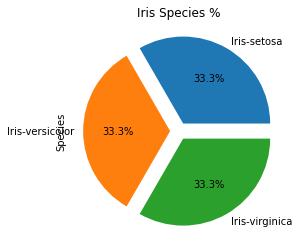

In [212]:
ax = plt.subplots(1,1, figsize = (5,4))
df['Species'].value_counts().plot.pie(explode = [0.1,0.1,0.1], autopct = '%1.1f%%', shadow = False, figsize = (5,4))
plt.title("Iris Species %")
plt.show()

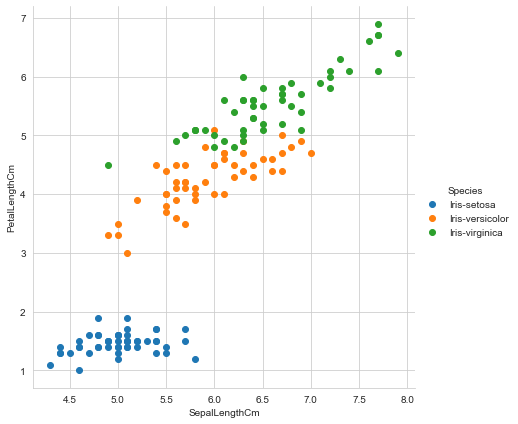

In [217]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'Species',
              height = 6).map(plt.scatter,
                              'SepalLengthCm',
                              'PetalLengthCm').add_legend();
# Noktalı virgülü açıklamaları silmek için kullandık.

In [ ]:
# Aynısını bir de genişlik için yapalım.

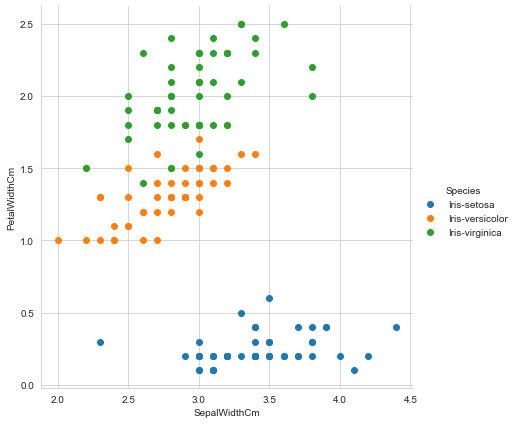

In [218]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'Species',
              height = 6).map(plt.scatter,
                              'SepalWidthCm',
                              'PetalWidthCm').add_legend();

In [176]:
# Model Training
# Train - %70, test - %30, verilerin %70'ini train, kalanını test seti yapalım.
X = df.drop(columns = ['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [177]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() # Önce Lojistik Regresyon algoritmasını deneyelim.

In [178]:
model.fit(x_train, y_train)

LogisticRegression()

In [179]:
print('Accuracy: ', model.score(x_test, y_test)*100)

Accuracy:  97.77777777777777


In [180]:
# Karar ağacı deneyelim.
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [181]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [182]:
print('Accuracy: ', model.score(x_test, y_test)*100)

Accuracy:  95.55555555555556


In [183]:
# KNN - k-nearest neighbor algoritması.
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [184]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [185]:
print('Accuracy: ', model.score(x_test, y_test)*100)
# Lojistik Regresyon da aynı doğruluğu verdi, biz yine de KNN'i seçerek devam edelim.

Accuracy:  97.77777777777777


In [187]:
import warnings
warnings.filterwarnings('ignore') 
# Jupyter Notebook ve Python versiyonu kaynaklı uyarıları almamak için bu kodu kullanıyoruz.

In [188]:
# Modeli kaydedip yeni değerler girerek tahmin yaptıralım.
import pickle
filename = 'savemodel.sav'
pickle.dump(model, open(filename, 'wb'))

In [189]:
x_test.head() # Test verilerinin ilk 5 değerini inceleyelim ve modelimizi deneyelim.

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
9,4.9,3.1,1.5,0.1
47,4.6,3.2,1.4,0.2
140,6.7,3.1,5.6,2.4
26,5.0,3.4,1.6,0.4
117,7.7,3.8,6.7,2.2


In [190]:
load_model = pickle.load(open(filename, 'rb'))

In [219]:
data['Species'].unique() 
# Toplamda 3 türümüz vardı, bunları kontrol edelim.

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [227]:
load_model.predict([[4.9, 3.1, 1.5, 0.1]]) 
# Yukarıdaki tabloda 9 numaralı verileri girip türüne bakalım.

array(['Iris-setosa'], dtype=object)

In [231]:
# Ayrıca orijinal tablodaki türle karşılaştıralım.
data.iloc[9]

Id                        10
SepalLengthCm            4.9
SepalWidthCm             3.1
PetalLengthCm            1.5
PetalWidthCm             0.1
Species          Iris-setosa
Name: 9, dtype: object

In [202]:
load_model.predict([[7.7, 3.8, 6.7, 2.2]])
# 117 numaralı girdinin türü.

array(['Iris-virginica'], dtype=object)

In [229]:
# Ayrıca orijinal tablodaki türle karşılaştıralım.
data.iloc[117]

Id                          118
SepalLengthCm               7.7
SepalWidthCm                3.8
PetalLengthCm               6.7
PetalWidthCm                2.2
Species          Iris-virginica
Name: 117, dtype: object

In [204]:
load_model.predict([[1.8, 4.6, 1.0, 4.2]])
# Şimdi de modeli denemek için kendi uydurduğumuz veya ölçtüğümüz değerleri girelim.

array(['Iris-setosa'], dtype=object)

In [205]:
load_model.predict([[6.0, 2.7, 3.0, 1.2]])

array(['Iris-versicolor'], dtype=object)

In [ ]:
# Yukarıda görüldüğü gibi, yeni girilen verilerin hangi türe ait olduğu tahmin edilebiliyor.
# Modelimiz düzgün çalışıyor.